<h2> Question 1a - Step 1 </h2>


In [2]:
import pandas as pd

# Introducing new column for all dataframes

# Humidity dataframe
humidity_df = pd.read_csv('humidity.csv', sep=',')
humidity_df['Sensor Type'] = 'humidity'
#display(humidity_df)

# Rain dataframe
rain_df = pd.read_csv('rain.csv', sep=',')
rain_df['Sensor Type'] = 'rain'
#display(rain_df)

# Temperature dataframe
temperature_df = pd.read_csv('temperature.csv', sep=',')
temperature_df['Sensor Type'] = 'temperature'
#display(temperature_df)

# Wind dataframe
wind_df = pd.read_csv('wind.csv', sep=',')
wind_df['Sensor Type'] = 'wind'
#display(wind_df)

# Others dataframe
others_df = pd.read_csv('others.csv', sep=',')
others_df['Sensor Type'] = 'others'
#display(others_df)

<h2> Question 1a - Step 2 </h2>

In [3]:
# Combine all the dataframes
singleDF = pd.concat([humidity_df,rain_df,temperature_df,wind_df,others_df])
#display(singleDF)

# Re-arrange the columns as per ECA requirements
cols = singleDF.columns.tolist()
cols = ['Station Name', 'Measurement Timestamp', 'Sensor Type', 'Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain', 'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life']
singleDF = singleDF[cols]
#display(singleDF)

# Check Measurement Timestamp object type
singleDF['Measurement Timestamp'].dtypes # Returns 'O' = objects

# Convert column to date time
singleDF['Measurement Timestamp'] = pd.to_datetime(singleDF['Measurement Timestamp'])

# Sort by time in ascending order
singleDF.sort_values(by='Measurement Timestamp', inplace=True)
display(singleDF)

,Station Name,Measurement Timestamp,Sensor Type,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
1484,Oak Street Weather Station,2021-05-17 14:59:59.129877,humidity,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7191,63rd Street Weather Station,2021-05-17 14:59:59.380916,temperature,15.70,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,Oak Street Weather Station,2021-05-17 14:59:59.450670,others,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1001.5,340.0,NaN,12.1
9855,Foster Weather Station,2021-05-17 14:59:59.547722,rain,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7329,Foster Weather Station,2021-05-17 14:59:59.643309,wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.3,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12253,Oak Street Weather Station,2021-12-18 05:00:00.047692,temperature,3.50,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3239,Foster Weather Station,2021-12-18 05:00:00.378254,wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.3,0.0,NaN,NaN,NaN,NaN
4728,Oak Street Weather Station,2021-12-18 05:00:00.581663,humidity,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,Foster Weather Station,2021-12-18 05:00:00.608831,humidity,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2> Question 1b </h2>

In [4]:
# PER station name and PER measurement time stamp
singleDF.sort_values(by=['Station Name', 'Measurement Timestamp'], inplace=True)
filledDF = singleDF.ffill(axis = 0).reset_index(drop=True)
#singleDF.to_csv('check.csv') # to check
display(filledDF)

# Convert to new CSV to work on
filledDF.to_csv('filled.csv')

,Station Name,Measurement Timestamp,Sensor Type,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
0,63rd Street Weather Station,2021-05-17 14:59:59.380916,temperature,15.7,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,63rd Street Weather Station,2021-05-17 14:59:59.956473,rain,15.7,14.0,NaN,0.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63rd Street Weather Station,2021-05-17 15:00:00.321877,wind,15.7,14.0,NaN,0.0,0.0,11.0,NaN,51.0,1.3,2.7,NaN,NaN,352.0,NaN
3,63rd Street Weather Station,2021-05-17 15:00:00.741304,others,15.7,14.0,NaN,0.0,0.0,11.0,0.0,51.0,1.3,2.7,1000.6,467.0,352.0,11.8
4,63rd Street Weather Station,2021-05-17 15:00:00.889681,humidity,15.7,14.0,83.0,0.0,0.0,11.0,0.0,51.0,1.3,2.7,1000.6,467.0,352.0,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,Oak Street Weather Station,2021-12-18 04:59:59.423306,rain,3.6,2.7,87.0,0.0,0.0,26.7,0.0,74.0,4.8,6.1,994.8,0.0,357.0,11.9
74246,Oak Street Weather Station,2021-12-18 04:59:59.759261,others,3.6,2.7,87.0,0.0,0.0,26.7,0.0,74.0,4.8,6.1,994.6,0.0,357.0,12.0
74247,Oak Street Weather Station,2021-12-18 04:59:59.866216,wind,3.6,2.7,87.0,0.0,0.0,26.7,0.0,67.0,4.8,6.6,994.6,0.0,357.0,12.0
74248,Oak Street Weather Station,2021-12-18 05:00:00.047692,temperature,3.5,2.8,87.0,0.0,0.0,26.7,0.0,67.0,4.8,6.6,994.6,0.0,357.0,12.0


<h2> Question 1c </h2>

In [5]:
# Read csv file from question 1b
sortedNewDF = pd.read_csv('filled.csv', sep=',', parse_dates=[2], index_col=0)
sortedNewDF['Measurement Timestamp'] = pd.to_datetime(sortedNewDF['Measurement Timestamp']) # Convert to datetime object
sortedNewDF['New'] = sortedNewDF['Measurement Timestamp'] # Temporary column to group later
sortedNewDF['New'] = pd.to_datetime(sortedNewDF['New']).dt.strftime("%Y-%m-%d") # Date format
#display(sortedNewDF)
index = pd.DatetimeIndex(sortedNewDF['Measurement Timestamp'])

newDataFrame = pd.DataFrame()
for x in range(24):# 24 hours loop across the day
    if x != 23:
        c = str(x)
        d = str(x + 1)
        a = c + ':16:00'
        b = d + ':15:59'
    else :
        a = '23:16:00' 
        b = '00:15:59'
    #print(a)
    #print(b)
    find = sortedNewDF.iloc[index.indexer_between_time(a,b)] #locate between 2 time
    find = find.groupby(['Station Name', 'New']).tail(1) # get the last record based on date
    newDataFrame = newDataFrame.append(find) # append into new empty df
  
newDataFrame.sort_values(by=['Station Name', 'Measurement Timestamp'], inplace=True) #sort by station name and time
newDataFrame['Hourly Timestamp'] = newDataFrame['Measurement Timestamp'] #additional column to display time
newDataFrame['Hourly Timestamp'] = pd.to_datetime(newDataFrame['Hourly Timestamp']).dt.strftime("%Y-%m-%d %H:%M:%S") #formating
newDataFrame['Hourly Timestamp'] = pd.to_datetime(newDataFrame['Hourly Timestamp']).dt.round('H')
del newDataFrame["New"] #remove columns, no longer in use
newcols=['Station Name', 'Hourly Timestamp', 'Measurement Timestamp', 'Sensor Type', 'Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain', 'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life']
newDataFrame = newDataFrame[newcols].reset_index(drop=True)
display(newDataFrame)
#newDataFrame.to_csv('testing.csv')

,Station Name,Hourly Timestamp,Measurement Timestamp,Sensor Type,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
0,63rd Street Weather Station,2021-05-17 15:00:00,2021-05-17 15:00:00.889681,humidity,15.7,14.0,83.0,0.0,0.0,11.0,0.0,51.0,1.3,2.7,1000.6,467.0,352.0,11.8
1,63rd Street Weather Station,2021-05-17 16:00:00,2021-05-17 16:00:00.452415,others,16.1,14.4,84.0,0.0,0.0,11.0,0.0,51.0,1.1,1.9,1000.3,283.0,351.0,11.9
2,63rd Street Weather Station,2021-05-17 17:00:00,2021-05-17 17:00:00.459542,temperature,15.7,13.8,81.0,0.0,0.0,11.0,0.0,85.0,1.0,2.3,1000.4,196.0,351.0,11.9
3,63rd Street Weather Station,2021-05-17 18:00:00,2021-05-17 18:00:00.853017,others,14.6,13.5,89.0,0.0,0.0,11.0,0.0,80.0,2.5,3.6,1000.6,145.0,351.0,11.9
4,63rd Street Weather Station,2021-05-17 19:00:00,2021-05-17 19:00:00.677726,others,14.4,13.3,89.0,0.0,0.0,11.0,60.0,10.0,1.4,2.2,1000.4,155.0,350.0,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14869,Oak Street Weather Station,2021-12-18 01:00:00,2021-12-18 00:59:59.922906,others,5.1,2.6,65.0,0.0,0.1,25.7,0.0,110.0,3.8,5.3,995.9,0.0,357.0,11.9
14870,Oak Street Weather Station,2021-12-18 02:00:00,2021-12-18 02:00:00.871278,rain,3.8,2.2,77.0,0.6,0.9,26.5,60.0,110.0,4.2,6.3,995.2,0.0,357.0,11.9
14871,Oak Street Weather Station,2021-12-18 03:00:00,2021-12-18 03:00:00.643588,humidity,3.9,2.6,81.0,0.0,0.0,26.6,0.0,104.0,4.6,6.0,994.8,0.0,357.0,11.9
14872,Oak Street Weather Station,2021-12-18 04:00:00,2021-12-18 04:00:00.650439,wind,3.6,2.7,87.0,0.0,0.1,26.7,0.0,74.0,4.8,6.1,994.8,0.0,357.0,11.9


<h2> Question 1d </h2>

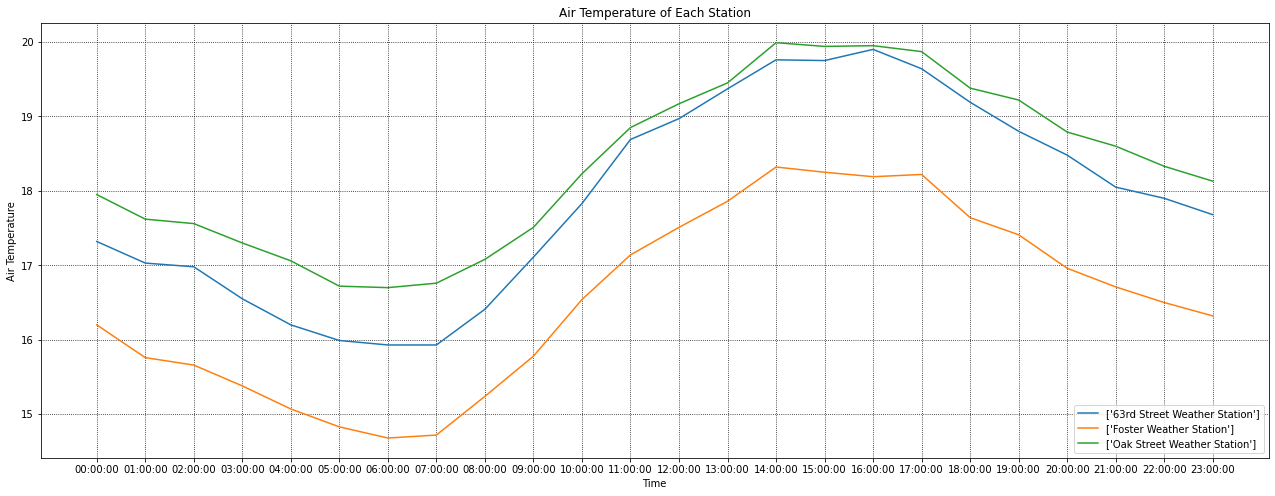

' insight - through this line chart, we can conclude the following:\n1. 63rd Street Weather Station and Foster Weather Station is located near each other due to its temperature being fairly close through the year\n2. The graph has shown a similar trend between all 3 stations which suggests that they might belong in the same country '

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

graphDF = newDataFrame.copy()

# Cleansing data
graphDF = graphDF.drop(['Humidity', 'Wet Bulb Temperature', 'Rain Intensity', 'Interval Rain', 'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life', 'Sensor Type'], axis=1)

# Data set is too huge, will be finding the average on an hourly basis for the entire year
graphDF['NewTime'] = graphDF['Hourly Timestamp']
graphDF['NewTime'] = pd.to_datetime(graphDF['NewTime']).dt.strftime("%H:%M:%S") # Only need the time to filter


#display(graphDF)

# Station by station, find hourly avg
graphDF = graphDF.groupby(['Station Name', 'NewTime']).mean()

# Round to 2 decimal
graphDF['Air Temperature'] = graphDF['Air Temperature'].round(2)

# to csv to read again
finalGraph = graphDF.to_csv('finalGraph.csv')
graph_df = pd.read_csv('finalGraph.csv', sep=',')
#display(graph_df)

rem = graph_df.pivot(index = 'NewTime', columns = 'Station Name', values= 'Air Temperature')
rem = rem.reset_index()
#display(rem)

# plot lines
fig = plt.figure() 
fig.set_size_inches(22,8)

plt.ylabel('Air Temperature')
plt.xlabel('Time')
plt.title('Air Temperature of Each Station')

plt.plot(rem.NewTime, rem["63rd Street Weather Station"], label=['63rd Street Weather Station'])
plt.plot(rem.NewTime, rem["Foster Weather Station"], label=['Foster Weather Station'])
plt.plot(rem.NewTime, rem["Oak Street Weather Station"], label=['Oak Street Weather Station'] )
plt.grid(True,color='k', linestyle=':')
plt.legend(loc=4)
plt.show()

''' insight - through this line chart, we can conclude the following:
1. 63rd Street Weather Station and Foster Weather Station is located near each other due to its temperature being fairly close through the year
2. The graph has shown a similar trend between all 3 stations which suggests that they might belong in the same country '''

<h2> Question 1e </h2>

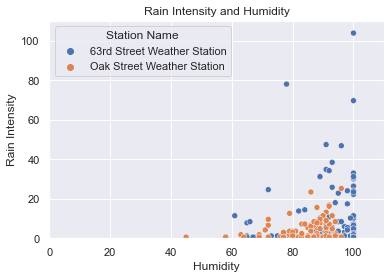

' Insights - \n1. Rain occur most when humidity is above 60. \n2. Only 2 stations out of 3 is experiencing rain.\n3. Strong positive correlation between humidity and rain as the plots are close and in the same direction\n4. High intensity of rain is observed in 63rd Street Weather Station as compared to Oak Street Weather Station'

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

relationDF = newDataFrame.copy()
#display(relationDF)

#Cleanse dataframe
relationDF = relationDF.drop(['Sensor Type', 'Air Temperature', 'Wet Bulb Temperature',  'Interval Rain', 'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life', 'Hourly Timestamp', 'Measurement Timestamp'], axis=1)

#display(relationDF)

relationData = relationDF.to_csv('relationData.csv')

# Filter out days that are not rainy
dropRain = relationDF[(relationDF != 0).all(1)] # only 214 rainy days

#reset index - format
dropRain = dropRain.reset_index(drop=True)

dropRain.sort_values(by="Rain Intensity")
#display(dropRain)

# Check Min Max
mini = dropRain['Rain Intensity'].min()
maxi = dropRain['Rain Intensity'].max()
#display(mini) 0.6
#display(maxi) 103.8

mini2 = dropRain['Humidity'].min()
maxi2 =  dropRain['Humidity'].max()
#display(mini2) 45
#display(maxi2) 100

sns.set(style = "darkgrid")
plotting = sns.scatterplot(data=dropRain, x="Humidity", y="Rain Intensity", hue="Station Name")
# control x and y limits
plt.ylim(0, 110)
plt.xlim(0, 110)
plt.title('Rain Intensity and Humidity')
plt.show()


''' Insights - 
1. Rain occur most when humidity is above 60. 
2. Only 2 stations out of 3 is experiencing rain.
3. Strong positive correlation between humidity and rain as the plots are close and in the same direction
4. High intensity of rain is observed in 63rd Street Weather Station as compared to Oak Street Weather Station'''

<h2> Question 2a </h2>


In [9]:
import sqlite3
#into sqlite3
conn = sqlite3.connect('britishFamily2.sqlite')
cur = conn.cursor()
cur.execute("CREATE TABLE british_monarch_family_tree(id integer PRIMARY KEY AUTOINCREMENT, name text, wiki_url text) ")


In [10]:
import requests
from bs4 import BeautifulSoup
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

user_agent = {'User-Agent': 'Mozilla/5.0'}
url = 'https://en.wikipedia.org/w/index.php?title=Family_tree_of_British_monarchs&oldid=1043575587'
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://',adapter)
session.mount('http://',adapter)

page = session.get(url)



In [11]:
soup = BeautifulSoup(page.content)

#loop to get name and wiki url
for find in soup.find_all(colspan="6"):
    for atag in find.find_all('a', title=True): # find titles
        name = atag.text
        break
    for href in find.find_all('a', href=True): # find links
        link = href['href']
        break
    
    myOwnPage = session.get("https://en.wikipedia.org" + link)
    myOwnSoup = BeautifulSoup(myOwnPage.content)
    myOwnName = myOwnSoup.find("h1").text
    
    if "House" not in name:#clean up unwanted info
        cur.execute('INSERT INTO british_monarch_family_tree (name,wiki_url) VALUES (?,?)',(myOwnName,"https://en.wikipedia.org" + link))
        conn.commit()
        


In [12]:
#printing and checking info is successfully stored
cur.execute('SELECT id,name,wiki_url FROM british_monarch_family_tree')
for row in cur:
    print(row)
#cur.execute('DELETE FROM british_monarch_family_tree')

(1, 'Alfred the Great', 'https://en.wikipedia.org/wiki/Alfred_the_Great')
(2, 'Edward the Elder', 'https://en.wikipedia.org/wiki/Edward_the_Elder')
(3, 'Æthelstan', 'https://en.wikipedia.org/wiki/%C3%86thelstan')
(4, 'Edmund I', 'https://en.wikipedia.org/wiki/Edmund_I')
(5, 'Eadred', 'https://en.wikipedia.org/wiki/Eadred')
(6, 'Eadwig', 'https://en.wikipedia.org/wiki/Eadwig')
(7, 'Edgar the Peaceful', 'https://en.wikipedia.org/wiki/Edgar_the_Peaceful')
(8, 'Sweyn Forkbeard', 'https://en.wikipedia.org/wiki/Sweyn_Forkbeard')
(9, 'Richard I of Normandy', 'https://en.wikipedia.org/wiki/Richard_I_of_Normandy')
(10, 'Godwin, Earl of Wessex', 'https://en.wikipedia.org/wiki/Godwin,_Earl_of_Wessex')
(11, 'Edward the Martyr', 'https://en.wikipedia.org/wiki/Edward_the_Martyr')
(12, 'Æthelred the Unready', 'https://en.wikipedia.org/wiki/%C3%86thelred_the_Unready')
(13, 'Emma of Normandy', 'https://en.wikipedia.org/wiki/Emma_of_Normandy')
(14, 'Cnut', 'https://en.wikipedia.org/wiki/Cnut_the_Great')

<h2> Question 2b </h2>

In [13]:
# Run only once; Modification to DB

cur.execute("ALTER TABLE british_monarch_family_tree ADD father_id integer")
cur.execute("ALTER TABLE british_monarch_family_tree ADD mother_id integer")


In [14]:
import time
#from requests.packages.urllib3.util.retry import Retry

cur.execute('SELECT id,name,wiki_url,father_id,mother_id FROM british_monarch_family_tree')
Query1 = cur.fetchall()

for row in Query1:
    page = session.get(row[2])
    soup = BeautifulSoup(page.content)
    
    for fam in soup.find_all("tr"):
        for row2 in fam.find_all("th"):
            if row2.text == "Father":    
                for dadlink in fam.find_all('a', href=True):
                    dad_link = dadlink['href']
                    if "/wiki" in dad_link:
                        url = "https://en.wikipedia.org" + dad_link
                        dadPage = session.get(url)
                        dadSoup = BeautifulSoup(dadPage.content)
                        dadName = dadSoup.find("h1").text
                        
                        ##Checking Dad's Name whether it is in DB ##
                        sql_select_query2 = ''' SELECT id FROM british_monarch_family_tree WHERE name=?'''
                        data_query2 = (dadName,)
                        cur.execute(sql_select_query2,data_query2)
                        Query2 = cur.fetchone()
                        

                        dadId = Query2
                        if Query2 == None: ## DAD is not in DB, Insert new member
                            sql_insert_query1 = '''INSERT INTO british_monarch_family_tree (name,wiki_url) VALUES (?,?)'''
                            insert_query1 = (dadName,"https://en.wikipedia.org" + dad_link)
                            cur.execute(sql_insert_query1,insert_query1)
                                
                            cur.execute('SELECT last_insert_rowid()')
                            Query3 = cur.fetchone()
                            dadId = Query3

                        ## Dad is in DB, update child.
                        sql_update_query1 = '''UPDATE british_monarch_family_tree SET father_id=? WHERE id=?'''
                        update_query1 = (dadId[0],row[0])
                        cur.execute(sql_update_query1,update_query1)
                            
            elif row2.text == "Mother":
                for mumlink in fam.find_all('a', href=True):
                    mum_link = mumlink['href']
                    if "/wiki" in mum_link:
                        url = "https://en.wikipedia.org" + mum_link
                        mumPage = session.get(url)
                        mumSoup = BeautifulSoup(mumPage.content)
                        try:
                            mumName = mumSoup.find("h1").text
                            #mumName2 = mumSoup.find(class_ = "infobox-above fn").text
                        except:
                            print("Unable to find mumName")
                        
                        ## Checking Mum's name whether is in DB ##
                        sql_select_query4 = '''SELECT id FROM british_monarch_family_tree WHERE name=?'''
                        data_query4 = (mumName,)
                        cur.execute(sql_select_query4,data_query4)
                        Query4 = cur.fetchone()
                        
                        mumId = Query4
                        if Query4 == None: ## MuM is not in DB, Add New Number
                            sql_insert_query2 = ''' INSERT INTO british_monarch_family_tree (name,wiki_url) VALUES (?,?) '''
                            insert_query2 = (mumName,"https://en.wikipedia.org" + mum_link)
                            cur.execute(sql_insert_query2,insert_query2)
                            
                            cur.execute('SELECT last_insert_rowid()')
                            Query5 = cur.fetchone()
                            mumId = Query5
                            
                        sql_update_query2 = '''UPDATE british_monarch_family_tree SET mother_id=? WHERE id=?'''
                        update_query2 = (mumId[0],row[0])
                        cur.execute(sql_update_query2,update_query2)
                            

In [16]:
cur.execute('SELECT id,name,wiki_url,father_id,mother_id FROM british_monarch_family_tree')
for row in cur:
    print(row)

(1, 'Alfred the Great', 'https://en.wikipedia.org/wiki/Alfred_the_Great', 94, 95)
(2, 'Edward the Elder', 'https://en.wikipedia.org/wiki/Edward_the_Elder', 1, 96)
(3, 'Æthelstan', 'https://en.wikipedia.org/wiki/%C3%86thelstan', 2, 97)
(4, 'Edmund I', 'https://en.wikipedia.org/wiki/Edmund_I', 2, 98)
(5, 'Eadred', 'https://en.wikipedia.org/wiki/Eadred', 2, 98)
(6, 'Eadwig', 'https://en.wikipedia.org/wiki/Eadwig', 4, 99)
(7, 'Edgar the Peaceful', 'https://en.wikipedia.org/wiki/Edgar_the_Peaceful', 4, 99)
(8, 'Sweyn Forkbeard', 'https://en.wikipedia.org/wiki/Sweyn_Forkbeard', 100, 101)
(9, 'Richard I of Normandy', 'https://en.wikipedia.org/wiki/Richard_I_of_Normandy', 102, 103)
(10, 'Godwin, Earl of Wessex', 'https://en.wikipedia.org/wiki/Godwin,_Earl_of_Wessex', 104, None)
(11, 'Edward the Martyr', 'https://en.wikipedia.org/wiki/Edward_the_Martyr', 7, 105)
(12, 'Æthelred the Unready', 'https://en.wikipedia.org/wiki/%C3%86thelred_the_Unready', 7, 106)
(13, 'Emma of Normandy', 'https://en.w

<h2> Question 2c </h2>

In [18]:
# Apply SQLite3 library to find all children of King "George III"

# Locate King George III ID number

cur.execute('SELECT id FROM british_monarch_family_tree WHERE wiki_url="https://en.wikipedia.org/wiki/George_III_of_the_United_Kingdom" ')
Query6 = cur.fetchone()
sql_select_query7 = ''' SELECT * FROM british_monarch_family_tree WHERE father_id = ?'''
data_query7 = (Query6[0],)
cur.execute(sql_select_query7,data_query7)
Query7 = cur.fetchall()

print("King George III's children are:")
for row in Query7:
    print(row)

King George III's children are:
(85, 'George IV', 'https://en.wikipedia.org/wiki/George_IV_of_the_United_Kingdom', 84, 158)
(86, 'William IV', 'https://en.wikipedia.org/wiki/William_IV_of_the_United_Kingdom', 84, 158)
(87, 'Prince Edward, Duke of Kent and Strathearn', 'https://en.wikipedia.org/wiki/Prince_Edward,_Duke_of_Kent_and_Strathearn', 84, 158)


<h2> Question 2d </h2>

In [20]:
# Find the father and mother of King George III

# Get the ID of King George III Father
cur.execute('SELECT father_id FROM british_monarch_family_tree WHERE wiki_url="https://en.wikipedia.org/wiki/George_III_of_the_United_Kingdom" ')
Query8 = cur.fetchone()
data_query8 = (Query8[0],)
print("King George III father ID is:")

# Find his Father information
sql_select_query8 = ''' SELECT * FROM british_monarch_family_tree WHERE id = ?'''
cur.execute(sql_select_query8,data_query8)
Query9 = cur.fetchall()

for row in Query9:
    print(row)

# Get the ID of King George III Mother
cur.execute('SELECT mother_id FROM british_monarch_family_tree WHERE wiki_url="https://en.wikipedia.org/wiki/George_III_of_the_United_Kingdom" ')
Query10 = cur.fetchone()
data_query9 = (Query10[0],)
print("King George III mother ID is:")
#print(data_query9)

# Find his Mother information
sql_select_query9 = ''' SELECT * FROM british_monarch_family_tree WHERE id = ?'''
cur.execute(sql_select_query9,data_query9)
Query10 = cur.fetchall()

for row in Query10:
    print(row)

King George III father ID is:
(83, 'Frederick, Prince of Wales', 'https://en.wikipedia.org/wiki/Frederick,_Prince_of_Wales', 82, 156)
King George III mother ID is:
(157, 'Princess Augusta of Saxe-Gotha', 'https://en.wikipedia.org/wiki/Princess_Augusta_of_Saxe-Gotha', None, None)


<h2> Question 2e </h2>

In [151]:
# Find George IV Father ID to find siblings
cur.execute('SELECT father_id FROM british_monarch_family_tree WHERE wiki_url="https://en.wikipedia.org/wiki/George_IV_of_the_United_Kingdom" ')
Query11 = cur.fetchone()
data_query10 = (Query11[0],)
print("King George IV father ID is:")
print(data_query10)

# Find George IV Mother ID to find siblings
cur.execute('SELECT mother_id FROM british_monarch_family_tree WHERE wiki_url="https://en.wikipedia.org/wiki/George_IV_of_the_United_Kingdom" ')
Query12 = cur.fetchone()
data_query11 = (Query12[0],)
print("King George IV mother ID is:")
print(data_query11)

# Find siblings
sql_select_query10 = ''' SELECT * FROM british_monarch_family_tree WHERE father_id = ? AND mother_id = ?'''
data_query12 = (Query11[0],Query12[0])
cur.execute(sql_select_query10, data_query12)
Query13 = cur.fetchall()

#Find George IV ID
cur.execute('SELECT id FROM british_monarch_family_tree WHERE wiki_url="https://en.wikipedia.org/wiki/George_IV_of_the_United_Kingdom" ')
Query14 = cur.fetchone()
data_query13 = (Query14[0],)
print("King George IV  ID is:")
print(data_query13)

print("King George IV siblings are:")
for row in Query13:
    if data_query13[0] not in row:
        print(row)

King George IV father ID is:
(84,)
King George IV mother ID is:
(158,)
King George IV  ID is:
(85,)
King George IV siblings are:
(86, 'William IV', 'https://en.wikipedia.org/wiki/William_IV_of_the_United_Kingdom', 84, 158)
(87, 'Prince Edward, Duke of Kent and Strathearn', 'https://en.wikipedia.org/wiki/Prince_Edward,_Duke_of_Kent_and_Strathearn', 84, 158)


<h2> Question 2f </h2>

In [21]:
# Find all descandents of Queen Victoria

# Step by step - Find Queen Victoria's ID first
cur.execute('SELECT id FROM british_monarch_family_tree WHERE wiki_url="https://en.wikipedia.org/wiki/Queen_Victoria" ')
Victoria_Query = cur.fetchone()
#print(Victoria_Query)
sql_select_for_Vic = ''' SELECT * FROM british_monarch_family_tree WHERE mother_id = ?'''
data_query_vic = (Victoria_Query[0],)
#print(data_query_vic)
cur.execute(sql_select_for_Vic,data_query_vic)
Victoria_Final_Query = cur.fetchall()

print("Queen Victoria's descendants are:")
for row in Victoria_Final_Query:
    print(row)

# Find Edward's Children
sql_select_for_Ed = ''' SELECT * FROM british_monarch_family_tree WHERE father_id = ?'''
data_query_ed = (row[0],)
cur.execute(sql_select_for_Ed, data_query_ed)
Edward_Final_Query = cur.fetchall()
for row2 in Edward_Final_Query:
    print(row2)

# Find George V's children
sql_select_for_george = ''' SELECT * FROM british_monarch_family_tree WHERE father_id = ?'''
data_query_george = (row2[0],)
cur.execute(sql_select_for_george, data_query_george)
George_Final_Query = cur.fetchall()

for row3 in George_Final_Query:
    print(row3)

# Check George's grandchildren
sql_select_for_grandchild = ''' SELECT * FROM british_monarch_family_tree WHERE father_id = ?'''
data_query_grandchildren = (row3[0],)
cur.execute(sql_select_for_grandchild, data_query_grandchildren)        
grandchildren_Final_Query = cur.fetchall()

for row4 in grandchildren_Final_Query:
    print(row4)


Queen Victoria's descendants are:
(89, 'Edward VII', 'https://en.wikipedia.org/wiki/Edward_VII', 160, 88)
(90, 'George V', 'https://en.wikipedia.org/wiki/George_V', 89, 161)
(91, 'Edward VIII', 'https://en.wikipedia.org/wiki/Edward_VIII', 90, 162)
(92, 'George VI', 'https://en.wikipedia.org/wiki/George_VI', 90, 162)
(93, 'Elizabeth II', 'https://en.wikipedia.org/wiki/Elizabeth_II', 92, 163)
